In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv("Mall_Customers.csv")

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scores = {'K': [], 'Silhouette': [], 'Davies-Bouldin': []}

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    scores['K'].append(k)
    scores['Silhouette'].append(round(sil, 3))
    scores['Davies-Bouldin'].append(round(dbi, 3))

score_df = pd.DataFrame(scores)
print(score_df)

   K  Silhouette  Davies-Bouldin
0  2       0.335           1.261
1  3       0.358           1.033
2  4       0.404           0.931
3  5       0.408           0.889


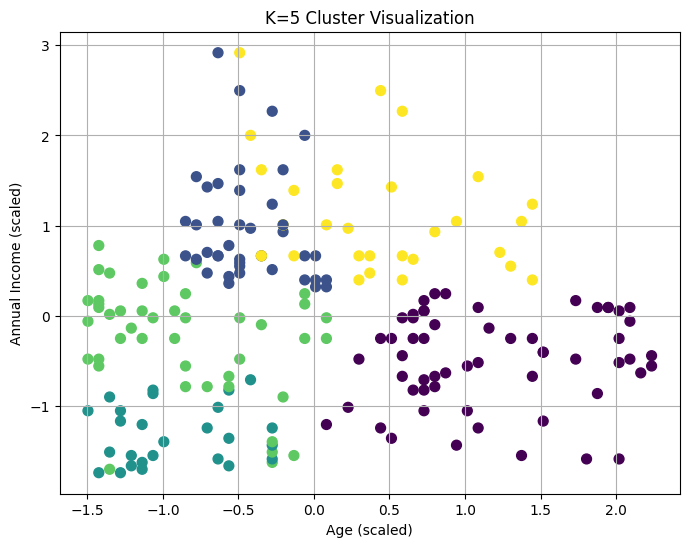

In [4]:
best_k = score_df.sort_values(by='Silhouette', ascending=False).iloc[0]['K']
kmeans_best = KMeans(n_clusters=int(best_k), random_state=42)
labels_best = kmeans_best.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_best, cmap='viridis', s=50)
plt.title(f"K={int(best_k)} Cluster Visualization")
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.grid(True)
plt.show()